<a href="https://colab.research.google.com/github/abhilash1910/AI-Geometric-Learning/blob/master/Chapter_2_Understanding_the_data/Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

     |████████████████████████████████| 7.9 MB 4.1 MB/s 
     |████████████████████████████████| 3.5 MB 3.9 MB/s 


In [ ]:
!pip install torch==1.10.0+cu111 torchvision==0.11.0+cu111 torchaudio==0.10.0 -f https://download.pytorch.org/whl/torch_stable.html

In [1]:
from torch_geometric.datasets import SNAPDataset
import torch
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

dataset=SNAPDataset('tmp/snap/','ego-facebook')


Extracting tmp/snap/ego-facebook/raw/facebook.tar.gz
Processing...
Done!


Dataset: SNAP-ego-facebook(10):
Number of graphs: 10
Number of features: 1406
Number of classes: 0


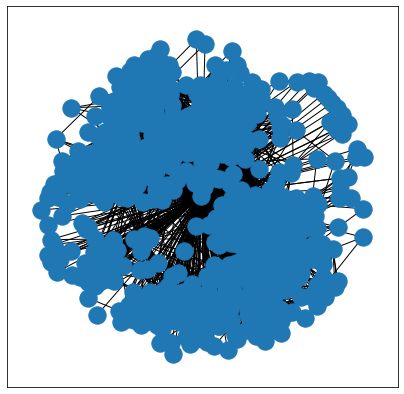

In [2]:
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import torch
import networkx as nx
def visualize(h, color, epoch=None, loss=None):
    """This is used for visualizing a partivular subgraph from the torch geoemtric dataset
        using networkx module.
    """

    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data=dataset[1]
G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)


In [ ]:
!pip install pyvis

In [5]:
## using the pyvis module to visualize the dataset

"""On running the draw_graph_pyvis command, a html page will be created and stored in Colab session. Users can 
download the html page or view it in the web browser. By default the physics of interaction are kept active along
with the Jupyter notebook display."""
from IPython.core.display import display, HTML
from pyvis import network as net
def draw_graph_pyvis(networkx_graph,notebook=True,output_filename='cora_graph.html',show_buttons=False,only_physics_buttons=True):
        """
        This function accepts a networkx graph object,
        converts it to a pyvis network object preserving its node and edge attributes,
        and both returns and saves a dynamic network visualization.

        Valid node attributes include:
            "size", "value", "title", "x", "y", "label", "color".

            (For more info: https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_node)

        Valid edge attributes include:
            "arrowStrikethrough", "hidden", "physics", "title", "value", "width"

            (For more info: https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_edge)


        Args:
            networkx_graph: The graph to convert and display
            notebook: Display in Jupyter? True/False
            output_filename: Where to save the converted network
            show_buttons: Show buttons in saved version of network?
            only_physics_buttons: Show only buttons controlling physics of network?
        """

      
        # make a pyvis network
        pyvis_graph = net.Network(notebook=notebook)
        pyvis_graph.width = '1000px'
        # for each node and its attributes in the networkx graph
        for node,node_attrs in networkx_graph.nodes(data=True):
            pyvis_graph.add_node(node,**node_attrs)
    #         print(node,node_attrs)

        # for each edge and its attributes in the networkx graph
        for source,target,edge_attrs in networkx_graph.edges(data=True):
            # if value/width not specified directly, and weight is specified, set 'value' to 'weight'
            if not 'value' in edge_attrs and not 'width' in edge_attrs and 'weight' in edge_attrs:
                # place at key 'value' the weight of the edge
                edge_attrs['value']=edge_attrs['weight']
            # add the edge
            pyvis_graph.add_edge(source,target,**edge_attrs)

        # turn buttons on
        if show_buttons:
            if only_physics_buttons:
                pyvis_graph.show_buttons(filter_=['physics'])
            else:
                pyvis_graph.show_buttons()

        # return and also save
        return pyvis_graph.show(output_filename)

draw_graph_pyvis(G,output_filename='SNAP_ego_facebook.html', notebook=True)
display(HTML('SNAP_ego_facebook.html'))

In [7]:
import random
import networkx as nx
class Random_Walk:
  def __init__(self,n_steps,graph,node):
    self.n_steps=n_steps
    self.graph=graph
    self.node=node
  def walk(self):
    self.local_path=[str(self.node),]
    target_node=self.node
    for i in range(self.n_steps):
      neighbors=list(nx.all_neighbors(self.graph,target_node))
      target_node=random.choice(neighbors)
      self.local_path.append(str(target_node))
    return self.local_path

    
if __name__=='__main__':
  node_list=[]
  for nodes in G.nodes():
    node_list.append(nodes)
  n_steps=4
  random_walk=Random_Walk(n_steps,G,node_list[0])
  walk_path=random_walk.walk()
  print(f"Random Walk path :{walk_path}")


Random Walk path :['0', '419', '1026', '432', '786']
